In [5]:
from selenium import webdriver
driver = webdriver.Chrome(executable_path = 'C:/Users/Sahil/.wdm/drivers/chromedriver/win32/102.0.5005.61/chromedriver.exe')
driver

<selenium.webdriver.chrome.webdriver.WebDriver (session="7daca74c73774b6335e0e758a1760039")>

In [2]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
from time import sleep
from bs4 import BeautifulSoup
import requests
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
driver.get('https://www.instagram.com/')
sleep(5)

#logged in by fb
btn = driver.find_element_by_xpath('//span[@class = "KPnG0"]')
btn.click()
sleep(5)

#email id
email_textbox = driver.find_element_by_xpath('//input[@name = "email"]')
email_textbox.send_keys('emailid')

#password
password_textbox = driver.find_element_by_xpath('//input[@name = "pass"]')
password_textbox.send_keys('pasword')

#clicking login btn
btn = driver.find_element_by_xpath('//button[@name = "login"]')
btn.click()

waiter = WebDriverWait(driver, 50).until(EC.visibility_of_element_located((By.XPATH, '//div[@class = "_a9-v"]')))
driver.find_element_by_xpath('//button[@class = "_a9-- _a9_1"]').click()


# Question 1.1

In [8]:
#search fod
search_box=driver.find_element_by_xpath('//input[@placeholder = "Search"]')
search_box.send_keys('food')
waiter=WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//div[@class= "_aacl _aaco _aacw _aacx _aad6"]')))

#add 10 foodhandles in list
foodhandles = []
count=0
for i in driver.find_elements_by_xpath('//div[@class= "_aacl _aaco _aacw _aacx _aad6"]'):
    if count==10:
        break
    foodhandles.append(i.text)
    count+=1
        
close = driver.find_element_by_xpath('//div/div[1]/div/div[1]/div/div/div[1]/div[1]/section/nav/div[2]/div/div/div[2]/div[2]')
close.click()
sleep(2)

#create dictionary
d={}
base_url = 'https://www.instagram.com/'


for i in range(len(foodhandles)):
    # we will use this method for every foodhandle
    curr_url = base_url + foodhandles[i]
    driver.get(curr_url)
    sleep(5)
    
    #find number of followers & add them in dictionary
    followers = driver.find_element_by_xpath('//div/div[1]/div/div[1]/div/div/div[1]/div[1]/section/main/div/header/section/ul/li[2]/a/div/span')
    f = followers.get_attribute('title')
    fn = int("".join(f.split(',')))
    d[foodhandles[i]] = fn
    
    
#sort dictionary in reverse order & print top 5 values    
sorted_d = dict(sorted(d.items(), key=lambda x:x[1], reverse=True))
count=0
for i in sorted_d:
    if count==5:
        break
    print(i, sorted_d[i]) 
    count+=1

    
    


foodie_incarnate 1356550
dilsefoodie 1022241
foodtalkindia 308266
food 181039
pune_food_blogger 134936


# Question 1.2

In [18]:
post_three_days = {}   #create dictionary for post past three days
count = 0
foodhandles_top5 = []     #create list for top5 food handles

#adding top5 food handles in list
for ele in sorted_d:
    if count==5:
        break
    foodhandles_top5.append(ele)
    count+=1
    

base_url = 'https://www.instagram.com/'

for i in range(len(foodhandles_top5)):
    
    no_of_posts = 0
    
    #for per food handle page
    curr_url = base_url + foodhandles_top5[i]
    driver.get(curr_url)
    sleep(3)
    
    #for all posts in that food handle
    posts = driver.find_elements_by_xpath('//div[@class = "_aabd _aa8k _aanf"]')
    for j in posts:
        sleep(3)
        j.click()
        sleep(3)
        
        #find date
        post_date =  driver.find_element_by_xpath('//div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[2]/div/div/a/div/time')
        date = post_date.get_attribute('title').split(' ')[1].split(',')[0]
        date_int = int(date)
        
        #check if date is before three days
        if date_int<11:
            break
        else:
            no_of_posts+=1 
            
        driver.back()
        sleep(3)
        driver.execute_script('window.scrollBy(0,100);')
        sleep(2)
    
    post_three_days[foodhandles_top5[i]] = no_of_posts
    

print(post_three_days)        
       
            
    
        

{'foodie_incarnate': 5, 'dilsefoodie': 4, 'foodtalkindia': 2, 'food': 1, 'pune_food_blogger': 3}


# Question 1.3

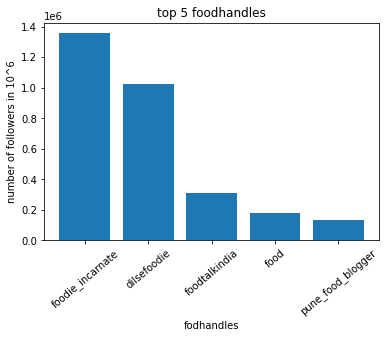

In [27]:
foodhandles_followers = []
foodhandles=[]
count=0
for ele in sorted_d:
    if count==5:
        break
    foodhandles_followers.append(sorted_d[ele])
    foodhandles.append(ele)
    count+=1

plt.bar(foodhandles, foodhandles_followers)
plt.xlabel('fodhandles')
plt.ylabel('number of followers in 10^6')
plt.xticks(rotation = 40)
plt.title('top 5 foodhandles')
plt.show()
    

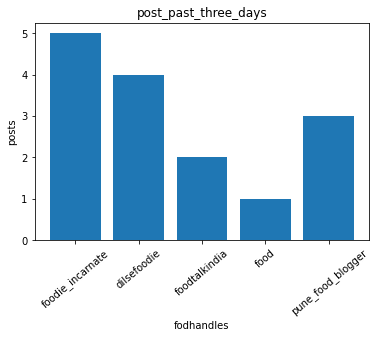

In [23]:
posts = []
foodhandles=[]
count=0
for ele in post_three_days:
    if count==5:
        break
    posts.append(post_three_days[ele])
    foodhandles.append(ele)
    count+=1
    
plt.bar(foodhandles, posts)
plt.xlabel('fodhandles')
plt.ylabel('posts')
plt.xticks(rotation = 40)
plt.title('post_past_three_days')
plt.show()
    

# Question 2.1

In [10]:
list_of_words = []
foodhandles_top5 = []
c=0
for ele in sorted_d:
    if c==5:
        break
    foodhandles_top5.append(ele)
    c+=1

base_url = 'https://www.instagram.com/'
for i in range(len(foodhandles_top5)):
    #for per food handle page
    curr_url = base_url + foodhandles_top5[i]
    driver.get(curr_url)
    sleep(3)
    count=0
    
    #for all posts in that food handle
    posts = driver.find_elements_by_xpath('//div[@class = "_aabd _aa8k _aanf"]')
    for j in posts:
        if count==10:
            break
        sleep(3)
        j.click()
        sleep(3)
        
        #find text of post & add all words in list
        post_details = driver.find_element_by_xpath('//div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span')
        for word in post_details.text.split(' '):
            list_of_words.append(word)
        count+=1
        
        driver.back()
        sleep(3)
        driver.execute_script('window.scrollBy(0,100);')
        sleep(3)
        
print(list_of_words)    

['These', 'Parathas', 'has', 'shelf', 'life', 'of', '2', 'years😳😳', 'Frozen', 'Paratha', 'Making😋😋\n.\nWatch', 'the', 'full', 'video', 'on', 'my', 'YouTube', 'channel.', 'Link', 'is', 'in', 'my', 'bio🤗🤗\n.\n#foodieincarnate', '#Reelitfeelit', '#reelkarofeelkaro', '#reelsinstagram', '#reels', '#paratha', '#indianfood', '#viralfood', '#explore', '#foodfactory', 'Crossed', '3', 'Million', 'subscribers', 'on', 'YouTube.🤩🤩\nIt', "wouldn't", 'have', 'been', 'possible', 'without', 'the', 'love', '&', 'support', 'of', 'you', 'guys.', 'Thank', 'you', 'every', 'single', 'one', 'of', 'you❤️🤗\n.\n#foodieincarnate', '#amarsirohi', 'Thick', '&', 'Creamy', 'Red', 'Velvet', 'Shake', 'from', '@shakesjunctionsaket', '🤩🤩\n.\nMust', 'visit', 'this', 'place', 'for', 'good', 'quality', 'thick', 'shakes', 'in', 'pocket', 'friendly', 'prices.', 'Address:', 'Shakes', 'Junction,', 'PVR', 'Anupam,', 'Saket\n.\n#foodieincarnate', '#Reelitfeelit', '#reelkarofeelkaro', '#reelsinstagram', '#reels', '#redvelvet', '#m

# Question 2.2

In [11]:
#find frequency
freq = {}
for i in list_of_words:
    if i in freq:
        freq[i]+=1
    else:
        freq[i]=1
        
word_freq = []
for i in freq:
    word_freq.append([i, freq[i]])

print(word_freq)

[['These', 1], ['Parathas', 1], ['has', 3], ['shelf', 1], ['life', 1], ['of', 17], ['2', 1], ['years😳😳', 1], ['Frozen', 1], ['Paratha', 1], ['Making😋😋\n.\nWatch', 1], ['the', 32], ['full', 6], ['video', 6], ['on', 8], ['my', 6], ['YouTube', 2], ['channel.', 2], ['Link', 2], ['is', 7], ['in', 7], ['bio🤗🤗\n.\n#foodieincarnate', 2], ['#Reelitfeelit', 4], ['#reelkarofeelkaro', 5], ['#reelsinstagram', 5], ['#reels', 5], ['#paratha', 2], ['#indianfood', 5], ['#viralfood', 3], ['#explore', 3], ['#foodfactory', 1], ['Crossed', 1], ['3', 4], ['Million', 1], ['subscribers', 1], ['YouTube.🤩🤩\nIt', 1], ["wouldn't", 1], ['have', 1], ['been', 2], ['possible', 1], ['without', 1], ['love', 1], ['&', 3], ['support', 1], ['you', 5], ['guys.', 1], ['Thank', 1], ['every', 1], ['single', 1], ['one', 1], ['you❤️🤗\n.\n#foodieincarnate', 1], ['#amarsirohi', 2], ['Thick', 1], ['Creamy', 1], ['Red', 1], ['Velvet', 1], ['Shake', 1], ['from', 3], ['@shakesjunctionsaket', 1], ['🤩🤩\n.\nMust', 1], ['visit', 1], ['th

# Question 2.3

In [12]:
#create pandas dataframe
df = pd.DataFrame(word_freq, columns=['Words', 'Frequency'])

,Words,Frequency
0,These,1
1,Parathas,1
2,has,3
3,shelf,1
4,life,1
...,...,...
473,@wendyscanada\n🎥:,1
474,@themessagecanada,1
475,#foodnews,1
476,#heinz,1


In [13]:
#create csv file
df.to_csv('Words_Freq', index = False) 

# Question 2.4

In [18]:
#find popular hashtags
df = df[df['Words'].str.startswith('#')]
popular_hashtags = df.sort_values('Frequency', ascending = False)[0:10]
print(popular_hashtags)

                 Words  Frequency
24     #reelsinstagram          5
25              #reels          5
27         #indianfood          5
23   #reelkarofeelkaro          5
22       #Reelitfeelit          4
137        #streetfood          4
79           #newdelhi          3
168       #foodblogger          3
29            #explore          3
28          #viralfood          3


# Question 2.5

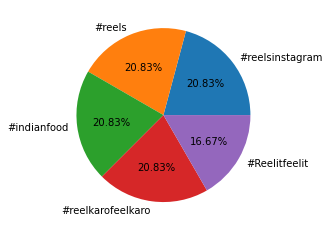

In [20]:
top5_hashtags = popular_hashtags.Words[0:5]
top5_hashtags_freq = popular_hashtags.Frequency[0:5]

#plot pie chart
plt.pie(top5_hashtags_freq, labels = top5_hashtags, autopct = "%.2f%%" )
plt.show()

# Question 3.1

In [17]:
# for this question I am unable to find likes of handle "food" as number of likes & views weren't displayed. 
#I have caluculated likes of other handles
# I have attached image in folder regarding the same.

foodhandles_top5 = []
co=0
for ele in sorted_d:
    if co==5:
        break
    foodhandles_top5.append(ele)
    co+=1
    
handles_likes = {}
base_url = 'https://www.instagram.com/'
for i in range(len(foodhandles_top5)):
    #for per food handle page
    if i==3:                   #skipped the handle "food"
        continue
    curr_url = base_url + foodhandles_top5[i]
    driver.get(curr_url)
    sleep(5)
    count=0
    total_likes = 0
    
    #for all posts in that food handle
    posts = driver.find_elements_by_xpath('//div[@class = "_aabd _aa8k _aanf"]')
    for j in posts:
        if count==10:
            break
        sleep(3)
        j.click()
        sleep(3)
        
        try:
            post_details = driver.find_element_by_xpath('//div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span')
            like = driver.find_element_by_xpath('//div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/section[2]/div/div/div/a/div')
            number_of_likes = int(''.join(like.text.split(' ')[0].split(',')))
            total_likes += number_of_likes
        
        #if number of likes aern't displayed then I have calculated number of views
        except NoSuchElementException:
            views = driver.find_element_by_xpath('//div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/section[2]/div/span/div')
            number_of_views = int(''.join(views.text.split(' ')[0].split(',')))
            total_likes += number_of_views
            
        count+=1
        driver.back()
        sleep(3)
        driver.execute_script('window.scrollBy(0,100);')
        sleep(3)
        
    handles_likes[foodhandles_top5[i]] = total_likes
    
print(handles_likes)

{'foodie_incarnate': 597518, 'dilsefoodie': 55609, 'foodtalkindia': 27684, 'pune_food_blogger': 37091}


foodie_incarnate 59751.8
dilsefoodie 5560.9
foodtalkindia 2768.4
pune_food_blogger 3709.1


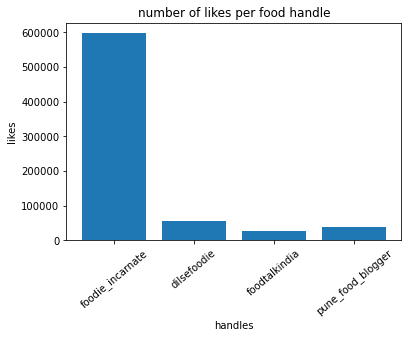

In [26]:
#create graphs of number of likes per foodhandles
handles = []
likes = []
for i in handles_likes:
    handles.append(i)
    likes.append(handles_likes[i])

for i in range(len(handles)):
    print(handles[i], avg_likes[i])    
    
plt.bar(handles, likes)
plt.xlabel('handles')
plt.xticks(rotation = 40)
plt.ylabel('likes')
plt.title('number of likes per food handle')
plt.show()

# Question 3.2

foodie_incarnate 59751.8
dilsefoodie 5560.9
foodtalkindia 2768.4
pune_food_blogger 3709.1


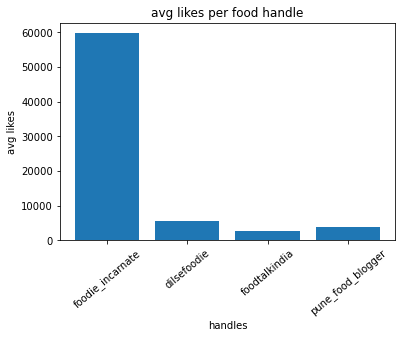

In [25]:
#create graphs of avg likes per foodhandles
avg_likes = []
for i in likes:
    avg_likes.append(i/10)

for i in range(len(handles)):
    print(handles[i], avg_likes[i])
    
plt.bar(handles, avg_likes)
plt.xlabel('handles')
plt.xticks(rotation = 40)
plt.ylabel('avg likes')
plt.title('avg likes per food handle')
plt.show()

# Question 3.3

foodie_incarnate 22.70308174816491
dilsefoodie 183.82653886960745
foodtalkindia 111.35168328276261
pune_food_blogger 36.37971475560109


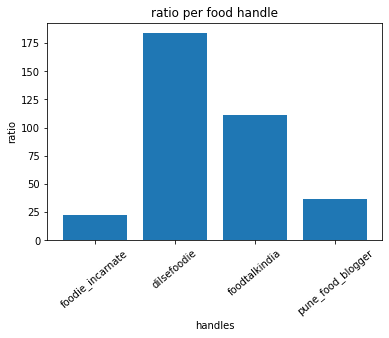

In [31]:
#calculate ratio & create graph as per food handle
followers = []
for i in range(len(foodhandles_followers)):
    if i==3:
        continue
    followers.append(foodhandles_followers[i])

ratio = []
for i in range(len(followers)):
    ratio.append(followers[i]/avg_likes[i])
    
for i in range(len(followers)):
    print(handles[i], ratio[i])

plt.bar(handles, ratio)
plt.xlabel('handles')
plt.xticks(rotation = 40)
plt.ylabel('ratio')
plt.title('ratio per food handle')
plt.show()